In [1]:
from fastFM.datasets import make_user_item_regression
from fastFM import als
from sklearn.metrics import mean_squared_error
import scipy.sparse as sp
import numpy as np

In [7]:
X, y, coef = make_user_item_regression(label_stdev=.4)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [3]:
X_train = sp.csc_matrix(X_train)
X_test = sp.csc_matrix(X_test)
n_iter = 50

In [11]:
rank = 4
seed = 333
step_size = 1
l2_reg_w = 0
l2_reg_V = 0

fm = als.FMRegression(n_iter=0, l2_reg_w=l2_reg_w,l2_reg_V=l2_reg_V, rank=rank, random_state=seed)

In [13]:
fm.fit(X_train, y_train)

rmse_train = []
rmse_test = []
for i in range(1, n_iter):
    fm.fit(X_train, y_train, n_more_iter=step_size)
    y_pred = fm.predict(X_test)
    rmse_train.append(np.sqrt(mean_squared_error(fm.predict(X_train), y_train)))
    rmse_test.append(np.sqrt(mean_squared_error(fm.predict(X_test), y_test)))

In [17]:
values = np.arange(1, n_iter)
rmse_test_re = []
rmse_train_re = []

for i in values:
    fm = als.FMRegression(n_iter=i, l2_reg_w=l2_reg_w,
            l2_reg_V=l2_reg_V, rank=rank, random_state=seed)
    fm.fit(X_train, y_train)
    rmse_test_re.append(np.sqrt(mean_squared_error(fm.predict(X_test), y_test)))
    rmse_train_re.append(np.sqrt(mean_squared_error(fm.predict(X_train), y_train)))

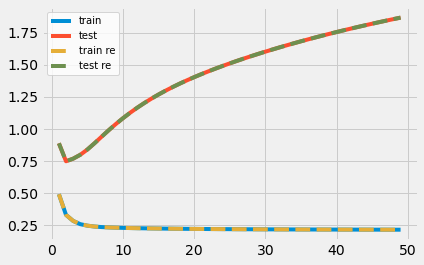

In [18]:
from matplotlib import pyplot as plt

x = np.arange(1, n_iter) * step_size

with plt.style.context('fivethirtyeight'):
    plt.plot(x, rmse_train, label='train')
    plt.plot(x, rmse_test, label='test')
    plt.plot(values, rmse_train_re, label='train re', linestyle='--')
    plt.plot(values, rmse_test_re, label='test re', ls='--')
plt.legend()
plt.show()